## Machine Learning Basics  
`Initiation`

Importing the essentials such `matplotlib.pyplot` and `numpy`

In [1]:
import matplotlib.pyplot as plt # Mainly used for graphical plotting
import numpy as np # The classic array use cases (tbh this is the real OG because pandas is made with the help with numpy)
import pandas as pd # The OG Padas folks
# plt.style.use('./deeplearning.mplstyle') # This sets the matplotlib with a special style won't worl for this case 

Defining x_train and y_train:
 - This `x_train` is the input variable (size in 1000 square feet)
 - The `y_train` is the target (price in 1000s of dollars)

In [2]:
x_train = np.array([1.0,2.0]) 
# the training set was created with an array containg the values 1.0 and 2.0
y_train = np.array([300.0,500.0])
# this set has values 300.0 and 500.0 in the array
print(f"x_train: {x_train}") # shows how this one looks
print("")
print(f"y_train: {y_train}") # same goes for this one as well


x_train: [1. 2.]

y_train: [300. 500.]


### Number of training Examples is m

We will use m to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry
for each dimension `x_train.shape[0]` - which is the length of the array and number of examples as shown below

In [3]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0] 
# Because at the time of initiation we knew that the array we had created was 1-D
print(f"The Number of training examples is {m}")

x_train.shape: (2,)
The Number of training examples is 2


In [4]:
# We could've used the Python len() function as well
m = len(x_train)
print(f"The number of training examples are: {m}")

The number of training examples are: 2


### Training example `x_i, y_i`

We will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. As we all know that Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (1.0, 300.0) and (x$^{(1)}$, y$^{(1)}$) is (2.0, 500.0). 

In [5]:
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f"The i'th training for x_train is: {x_i}\n and same for the y_train is: {y_i}")
# so if you wanted to see the 2nd or the 1st indexed item just change the i to 1


The i'th training for x_train is: 1.0
 and same for the y_train is: 300.0


#### Plotting the Data

We can plot these two points using the scatter() function in the matplotlib library, as shown in the cell below.

- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots)

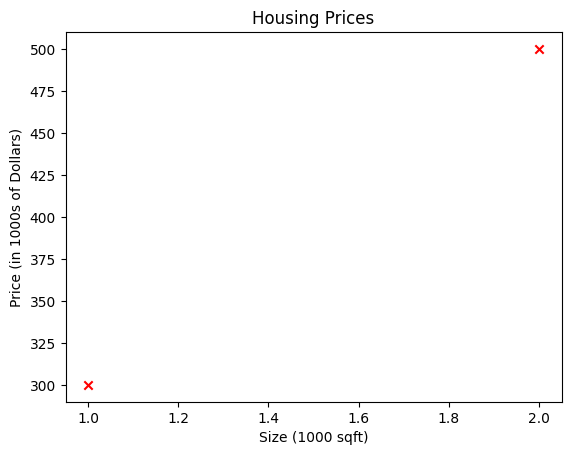

In [6]:
# Plotting the data Points
plt.scatter(x_train,y_train, marker = 'x', c = 'r') 
# the marker defines what the points will look like and c is the colour which in here is red 'r' for red
# Setting the title
plt.title('Housing Prices')
# Setting the y-axis label
plt.ylabel('Price (in 1000s of Dollars)')
# Setting the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()


If we could relate to a linear equation we may find this one familiar, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/>  <br/> 
Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.

In [7]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let us compute the value of $f_{w,b}(x^{(i)})$ for our two data points. We can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, we can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [8]:
def compute_model_output(x,w,b):
    """ 
    Computes the prediction of a linear model Args:
        x(ndarray(m,)) : Data, m examples
        w,b (scalar) : model parameters
    Returns 
        f_wb(ndarray(m,)): model_prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

# if you look closely enough during the compute_model_output first we get a array of fixed length of size m, every element is 0
# and then with value of x and the function the values change to what the operation does to them and 
# finally we get the whole array as return output
        

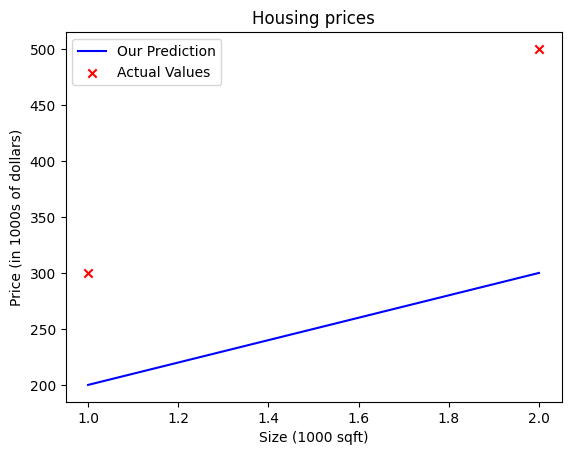

In [9]:
tmp_f_wb = compute_model_output(x_train, w, b)
#Plotting our model Prediction
plt.plot(x_train,tmp_f_wb, c = 'b', label = 'Our Prediction') 
# this one draws a line and the label will initiate a name-box on the top left corner
#Plotting The data Points
plt.scatter(x_train,y_train,marker = 'x',c = 'r', label = 'Actual Values')
# Setting the Title
plt.title("Housing prices")
# Setting the y-axis label
plt.ylabel("Price (in 1000s of dollars)")
# Setting the x-axis label
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()

# This model mre specifically the valus of w and b have caused us get wrong predictions


### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [10]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")
# See now we get a more realistic price

$340 thousand dollars


In [11]:
# lets try with a different value of w and b
w = 220
b = 104
x_i = 1.3
cost_1550sqft = w * x_i + b 

print(f"${cost_1550sqft:.0f} thousand dollars")

# if you look closely enough during the compute_model_output first we get a array of fixed length of size m, every element is 0
# and then with value of x and the function the values change to what the operation does to them and finally we get the whole array as return output

$390 thousand dollars


## The Game starts now

`Tools Used`
- Numpy
- Matplotlib
- Local Plotting routines

In [12]:
import numpy as np
# %matplotlib widget
import matplotlib.pyplot as plt
# from lab_utis_uni import plt_intuition,plt_stationary, plt_update_onclick, soup_bowl
# # plt.style.use('./deeplearning.mplstyle') 
# these ones are quite advanced and we will need to install sepcial packages in some special way
# for them to work that why I have marked them as comment

### *Performaing Similar Calculatiuons*
- `Defining the training sets`
- `Creating the function`
- `Showing Visuallizations`

In [13]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

def compute_cost(x,y,w,b):
    """
    Computes the cost function for linear regression.
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): target values
        w,b (scalar) : model parameters
        
    Returns total_cost(float): The cost of using w,b as the parameters for 
    linear regression to fir the data points in x and y 
        """
    m = x.shape[0] # we could also do m = len(x)
    cost_sum = 0 # initially there was no error
    for i in range(m):
        f_wb = w * x[i] + b # this is for the line
        cost = (f_wb - y[i]) ** 2 # the difference between the point in the line and the actual point
        cost_sum += cost # Summing up all the square of the errors

    total_cost = (1/(2*m)) * cost_sum # for even further accuracy

    return total_cost # (Summation of all the squared errors divivided by (2 * len of x))

# This is our newer better model

#### Testing for  a larger dataset

It is instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find $w$, and $b$ that will give us a cost of 0?

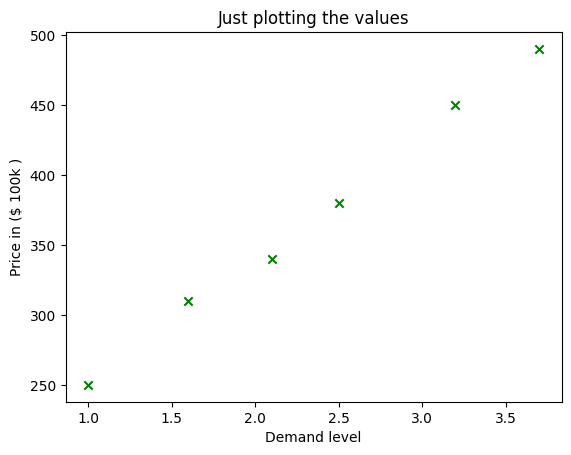

In [14]:
# Updating x_train and y_train with new and more values 
x_train = np.array([1.0,1.6,2.1,2.5,3.2,3.7])
y_train = np.array([250,310,340,380,450,490])


plt.scatter(x_train, y_train, marker = 'x', c = 'g')
plt.title('Just plotting the values')
plt.xlabel('Demand level')
plt.ylabel('Price in ($ 100k )')
plt.show()


### Gradient Descent Algorithm
- numpy
- matplotlib
- math

Are required to complete the understanding

In [15]:
# importing the required modules

try:
    import math, copy
    import numpy as np
    import matplotlib.pyplot as plt
    print('Modules successfully imported')
except:
    print('There is perhaps an error in any of the import statements')



Modules successfully imported


<a name="toc_40291_2"></a>
# Problem Statement

Let us use the same two data points as before - a house with 1000 square feet sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |


In [16]:
# Loading our dataset
x_train = np.array([1.0,2.0]) # this is the feature
y_train = np.array([300.0,500.0]) # target value that needs answering

#### Compute Cost Formula

In [17]:
# this cost_compute is the error basically

def compute_cost(x,y,w,b):
    m = len(x)
    cost = 0
    for i in range(m):
        f_wb = (w *x[i]) + b
        cost += (f_wb - y[i])**2
    total_cost = (1/(2*m)) * cost 

    return total_cost

In [18]:
# Trace to the gradient descent theory online

#### Compute Gradient 

In [19]:
def compute_gradient(x,y,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """

    # Number of training examples
    m = len[x]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = (w * x[i]) + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db
    

Epoch 0: Loss = 44.0000, w = 0.4400, b = 0.1200
Epoch 100: Loss = 0.0245, w = 1.8988, b = 0.3655
Epoch 200: Loss = 0.0124, w = 1.9279, b = 0.2605
Epoch 300: Loss = 0.0063, w = 1.9486, b = 0.1856
Epoch 400: Loss = 0.0032, w = 1.9634, b = 0.1323
Epoch 500: Loss = 0.0016, w = 1.9739, b = 0.0943
Epoch 600: Loss = 0.0008, w = 1.9814, b = 0.0672
Epoch 700: Loss = 0.0004, w = 1.9867, b = 0.0479
Epoch 800: Loss = 0.0002, w = 1.9905, b = 0.0341
Epoch 900: Loss = 0.0001, w = 1.9933, b = 0.0243

Final model: y = 2.00x + 0.02


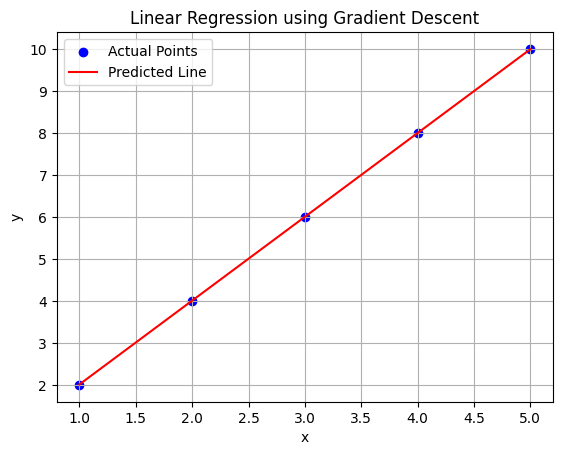

In [20]:
# A full Methodology of how the gradient descent works

# Sample training data (x, y)
x = np.array([1, 2, 3, 4, 5], dtype=np.float64)
y = np.array([2, 4, 6, 8, 10], dtype=np.float64)

# Initialize parameters
w = 0.0  # weight
b = 0.0  # bias

# Hyperparameters
learning_rate = 0.01
epochs = 1000  # Number of times to run gradient descent

n = len(x)  # Number of data points

# Gradient Descent Algorithm
for i in range(epochs):
    # Predicted y
    y_pred = w * x + b
    
    # Compute gradients
    dw = (2/n) * np.dot(x, (y_pred - y))
    db = (2/n) * np.sum(y_pred - y)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Print loss every 100 iterations
    if i % 100 == 0:
        loss = np.mean((y_pred - y) ** 2)
        print(f"Epoch {i}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

# Final model
print(f"\nFinal model: y = {w:.2f}x + {b:.2f}")

# Plotting
plt.scatter(x, y, color='blue', label='Actual Points')
plt.plot(x, w*x + b, color='red', label='Predicted Line')
plt.title("Linear Regression using Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# arr = [1,2,3,4,5]
# arr1 = np.array(arr)
# print(len(arr),len(arr1))